In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (14, 8)
df = pd.read_csv('Default_Data.csv', low_memory=False)

In [3]:
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [4]:
df.tail(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2218626,11/04/2025,19:45,BROOKLYN,11223,40.602020,-73.970510,"(40.60202, -73.97051)",AVENUE S,E 2 ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4854977,Sedan,Motorcycle,NaN,NaN,NaN
2218627,11/04/2025,17:37,MANHATTAN,10022,40.763416,-73.968780,"(40.763416, -73.96878)",NaN,NaN,109 E 60 ST,...,Unspecified,Unspecified,NaN,NaN,4855362,Sedan,Motorcycle,Sedan,NaN,NaN
2218628,10/27/2025,16:41,NaN,NaN,40.667915,-73.996414,"(40.667915, -73.996414)",GOWANUS EXPY (BQE),NaN,NaN,...,Unspecified,NaN,NaN,NaN,4855376,Flat Bed,Sedan,NaN,NaN,NaN
2218629,10/22/2025,20:22,QUEENS,11375,40.724968,-73.845505,"(40.724968, -73.845505)",108 ST,69 AVE,NaN,...,Unspecified,NaN,NaN,NaN,4855413,Sedan,NaN,NaN,NaN,NaN
2218630,11/04/2025,9:55,MANHATTAN,10036,40.760830,-73.998825,"(40.76083, -73.998825)",NaN,NaN,600 W 42 ST,...,Following Too Closely,NaN,NaN,NaN,4855026,Sedan,Garbage or Refuse,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218631 entries, 0 to 2218630
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
eksik_sayisi = df.isnull().sum()

eksik_yuzdesi = (df.isnull().sum() / len(df)) * 100

eksik_veri_tablosu = pd.concat([eksik_sayisi, eksik_yuzdesi], axis=1, keys=['Eksik Sayısı', 'Eksik Yüzdesi'])

eksik_veri_tablosu = eksik_veri_tablosu[eksik_veri_tablosu['Eksik Sayısı'] > 0].sort_values('Eksik Yüzdesi', ascending=False)

print(eksik_veri_tablosu)

                               Eksik Sayısı  Eksik Yüzdesi
VEHICLE TYPE CODE 5                 2208911      99.561892
CONTRIBUTING FACTOR VEHICLE 5       2208595      99.547649
VEHICLE TYPE CODE 4                 2183315      98.408208
CONTRIBUTING FACTOR VEHICLE 4       2181987      98.348351
VEHICLE TYPE CODE 3                 2064345      93.045892
CONTRIBUTING FACTOR VEHICLE 3       2058119      92.765268
OFF STREET NAME                     1827925      82.389771
CROSS STREET NAME                    847707      38.208562
ZIP CODE                             680182      30.657734
BOROUGH                              679907      30.645339
ON STREET NAME                       483080      21.773788
VEHICLE TYPE CODE 2                  444749      20.046101
CONTRIBUTING FACTOR VEHICLE 2        355979      16.044984
LATITUDE                             240341      10.832851
LONGITUDE                            240341      10.832851
LOCATION                             240341      10.8328

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,1978290.0,4.059071e+01,2.326301e+00,0.00000,4.066734e+01,4.072032e+01,4.076956e+01,4.334444e+01
LONGITUDE,1978290.0,-7.368484e+01,4.324753e+00,-201.35999,-7.397453e+01,-7.392676e+01,-7.386657e+01,0.000000e+00
NUMBER OF PERSONS INJURED,2218613.0,3.280716e-01,7.148684e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF PERSONS KILLED,2218600.0,1.585685e-03,4.206870e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
NUMBER OF PEDESTRIANS INJURED,2218631.0,5.955384e-02,2.499738e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER OF PEDESTRIANS KILLED,2218631.0,7.842674e-04,2.863060e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER OF CYCLIST INJURED,2218631.0,2.915942e-02,1.705230e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER OF CYCLIST KILLED,2218631.0,1.262040e-04,1.127340e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER OF MOTORIST INJURED,2218631.0,2.347240e-01,6.760237e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF MOTORIST KILLED,2218631.0,6.454431e-04,2.778727e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    top5 = df[col].value_counts().head(5)
    
    top5_pct = df[col].value_counts(normalize=True).head(5) * 100
    
    tablo = pd.DataFrame({
        'Değer': top5.index,
        'Kayıt Sayısı': top5.values,
        'Oran (%)': top5_pct.values
    })
    
    tablo['Oran (%)'] = tablo['Oran (%)'].round(2)
    
    print(f"\nTABLO: {col}")
    print("-" * 50) 
    print(tablo.to_string(index=False))
    print("=" * 50)


TABLO: CRASH TIME
--------------------------------------------------
Değer  Kayıt Sayısı  Oran (%)
16:00         29686      1.34
15:00         29176      1.32
17:00         29162      1.31
18:00         26919      1.21
14:00         26727      1.20

TABLO: BOROUGH
--------------------------------------------------
        Değer  Kayıt Sayısı  Oran (%)
     BROOKLYN        493110     32.05
       QUEENS        412302     26.80
    MANHATTAN        341031     22.16
        BRONX        227861     14.81
STATEN ISLAND         64420      4.19

TABLO: ZIP CODE
--------------------------------------------------
Değer  Kayıt Sayısı  Oran (%)
11207         30404      1.98
11236         20924      1.36
11101         20538      1.33
11203         19885      1.29
11234         19398      1.26

TABLO: LOCATION
--------------------------------------------------
                  Değer  Kayıt Sayısı  Oran (%)
             (0.0, 0.0)          6469      0.33
(40.608757, -74.038086)           846      

--------------------------------------------------
DETAYLI LOKASYON ANALİZİ (SAYILAR)
--------------------------------------------------
OFF STREET Durumu  Boş (Yok)  Dolu (Var)
ON STREET Durumu                        
Boş (Yok)              92418      390662
Dolu (Var)           1735507          44


--------------------------------------------------
DETAYLI LOKASYON ANALİZİ (ORANLAR %)
--------------------------------------------------
Has_Off_Street  Boş (Yok)  Dolu (Var)
Has_On_Street                        
Boş (Yok)            4.17       17.61
Dolu (Var)          78.22        0.00
--------------------------------------------------

🔍 HIZLI YORUM:
1. KRİTİK VERİ KAYBI: Toplam 92418 kazada (%4.17) her iki adres bilgisi de EKSİK.
2. ÇAKIŞMA: Toplam 44 kazada (%0.00) her iki alan da DOLU (Veri girişi hatası veya özel durum olabilir).


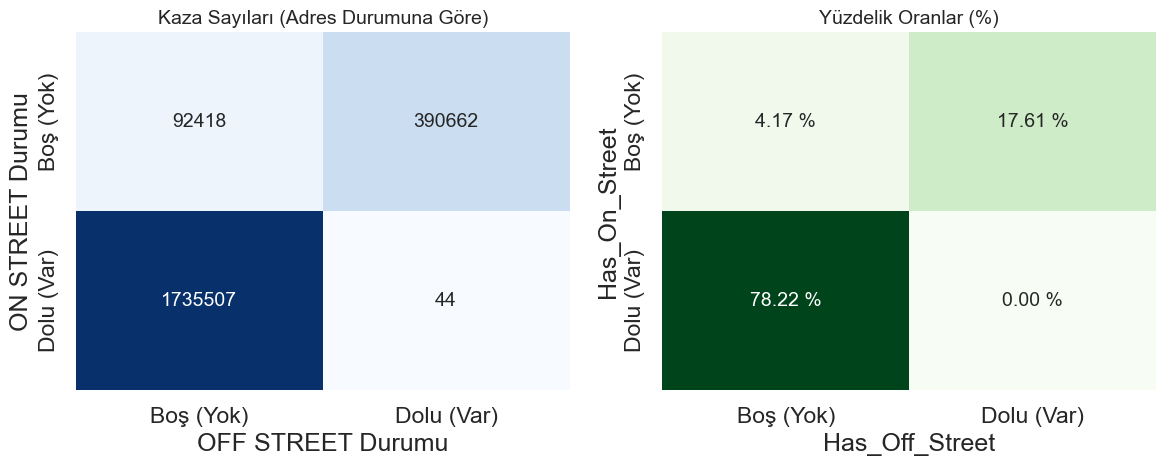

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Default_Data.csv', low_memory=False)

df['Has_On_Street'] = df['ON STREET NAME'].notna()
df['Has_Off_Street'] = df['OFF STREET NAME'].notna()

crosstab_count = pd.crosstab(df['Has_On_Street'], df['Has_Off_Street'])
crosstab_pct = pd.crosstab(df['Has_On_Street'], df['Has_Off_Street'], normalize='all') * 100

etiketler = {True: 'Dolu (Var)', False: 'Boş (Yok)'}
crosstab_count.rename(index=etiketler, columns=etiketler, inplace=True)
crosstab_pct.rename(index=etiketler, columns=etiketler, inplace=True)

crosstab_count.index.name = "ON STREET Durumu"
crosstab_count.columns.name = "OFF STREET Durumu"

print("-" * 50)
print("DETAYLI LOKASYON ANALİZİ (SAYILAR)")
print("-" * 50)
print(crosstab_count)
print("\n")
print("-" * 50)
print("DETAYLI LOKASYON ANALİZİ (ORANLAR %)")
print("-" * 50)
print(crosstab_pct.round(2))
print("-" * 50)

both_null = crosstab_count.loc['Boş (Yok)', 'Boş (Yok)']
both_full = crosstab_count.loc['Dolu (Var)', 'Dolu (Var)']
total = len(df)

print(f"1. KRİTİK VERİ KAYBI: Toplam {both_null} kazada (%{(both_null/total)*100:.2f}) her iki adres bilgisi de EKSİK.")
print(f"2. ÇAKIŞMA: Toplam {both_full} kazada (%{(both_full/total)*100:.2f}) her iki alan da DOLU (Veri girişi hatası veya özel durum olabilir).")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(crosstab_count, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Kaza Sayıları (Adres Durumuna Göre)', fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(crosstab_pct, annot=True, fmt='.2f', cmap='Greens', cbar=False, annot_kws={"size": 14})
plt.title('Yüzdelik Oranlar (%)', fontsize=14)
for t in plt.gca().texts: t.set_text(t.get_text() + " %")

plt.tight_layout()
plt.show()

In [ ]:


mask = (
    df['ON STREET NAME'].notna() &
    df['OFF STREET NAME'].notna() &
    (df['ON STREET NAME'].str.strip() != "") &
    (df['OFF STREET NAME'].str.strip() != "")
)

df_both = df[mask]

print(df_both[['CRASH DATE', 'CRASH TIME', 'BOROUGH',
               'ON STREET NAME', 'OFF STREET NAME']].head(10))


Empty DataFrame
Columns: [CRASH DATE, CRASH TIME, BOROUGH, ON STREET NAME, OFF STREET NAME]
Index: []
